/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


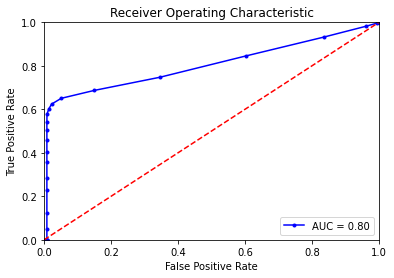

No handles with labels found to put in legend.


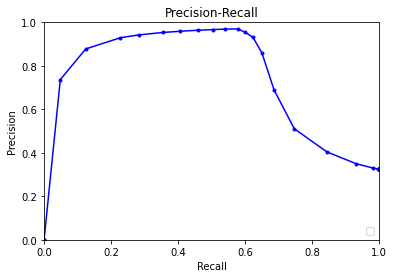

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import sys
import sklearn.metrics as metrics


df=pd.read_csv("./PRcurve.txt", sep=r',',header=0, skipinitialspace=True)


df['TPR'] = df.apply (lambda row: row["TP"]/(row["TP"]+row["FN"]), axis=1)
df['FPR'] = df.apply (lambda row: row["FP"]/(row["FP"]+row["TN"]), axis=1)
df['Precision'] = df.apply (lambda row: row["TP"]/(row["TP"]+row["FP"]), axis=1)
df['Recall'] = df.apply (lambda row: row["TP"]/(row["TP"]+row["FN"]), axis=1)
tpr = df["TPR"].to_numpy()
fpr = df["FPR"].to_numpy()
precision = df["Precision"].to_numpy()
recall = df["Recall"].to_numpy()


plot1 = plt.figure(1)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, marker='.')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plot2 = plt.figure(2)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Precision-Recall')
plt.plot(recall,precision, 'b', marker='.')
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
